In [39]:
# Importing required libraries

import time

from bs4 import BeautifulSoup
from selenium import webdriver

from pymongo import MongoClient


In [40]:
# Creating a connection to MongoDB
client = MongoClient('localhost', 27017)
db = client['news']
collection = db['elespectador0']
collection1 = db['elespectador1']
collection2= db['elespectador2']
collection3= db['elespectador3']
collection4 = db['elespectador4']


In [41]:
# Base URL of the site to be analyzed
SITE_URL = 'https://www.elespectador.com'


In [42]:
# Firefox web driver path
# Download the driver for you S.O. here: https://github.com/mozilla/geckodriver/releases
DRIVER_PATH = './geckodriver.exe'


In [43]:
# Creating a new firefox window
browser = webdriver.Firefox(executable_path=DRIVER_PATH)


In [44]:
def make_request(browser, relative_path):
    # Making the request and rendering the browser
    browser.get(SITE_URL + relative_path)

    # Simulating vertical scrolling for handling lazy load
    check_height = browser.execute_script('return document.body.scrollHeight;')
    while True:
        browser.execute_script(
            'window.scrollTo(0, document.body.scrollHeight);')
        time.sleep(3)
        height = browser.execute_script('return document.body.scrollHeight;')
        if height == check_height:
            break
        check_height = height

    # Getting HTML content and passing it to BeautifulSoup for scraping analysis
    return BeautifulSoup(browser.page_source, 'html.parser')


### Politica


In [45]:
# Getting HTML content for news listing page
categoria1 = '/archivo/politica/'
newsPolitica = []

for n in range(1, 11):
    soup = make_request(browser, (categoria1 + str(n)))
    layout = soup.find(class_='Layout-flexAds')
    blocks = layout.find('section').find_all(recursive=False)
    cards = blocks[0].find_all(class_='Card') + \
        blocks[1].find_all(class_='Card')
    for card in cards:
        newsPolitica.append({
            'title': card.find('h2', class_='Card-Title').find('a').get_text(),
            'relative_path': card.find('h2', class_='Card-Title').find('a')['href']
        })



In [47]:
for n in newsPolitica:
    # Getting HTML content for news page
    soup = make_request(browser, n['relative_path'])
    
    # Extracting news metadata
    n['datetime'] = soup.find(class_ = 'ArticleHeader-Date').get_text()
    n['author'] = soup.find(class_ = 'ACredit-Author').find('a').get_text()
    n['summary'] = soup.find(class_ = 'ArticleHeader-Hook').find('div').get_text()
    
    # Extracting and concatenating news full text
    paragraphs = soup.find_all(class_ = 'font--secondary')
    n['full_text'] = ' '.join([p.get_text() for p in paragraphs])

AttributeError: 'NoneType' object has no attribute 'get_text'

In [48]:
# Storing extracted information for further analysis
collection.insert_many(newsPolitica)


### Ciencia


In [49]:
categoria2 = '/archivo/ciencia/'
newsCiencia = []

for n in range(1, 11):
    soup = make_request(browser, (categoria2 + str(n)))
    layout = soup.find(class_='Layout-flexAds')
    blocks = layout.find('section').find_all(recursive=False)
    cards = blocks[0].find_all(class_='Card') + \
        blocks[1].find_all(class_='Card')
    for card in cards:
        newsCiencia.append({
            'title': card.find('h2', class_='Card-Title').find('a').get_text(),
            'relative_path': card.find('h2', class_='Card-Title').find('a')['href']
        })
    


In [50]:
for n in newsCiencia:
    # Getting HTML content for news page
    soup = make_request(browser, n['relative_path'])
    
    # Extracting news metadata
    n['datetime'] = soup.find(class_ = 'ArticleHeader-Date').get_text()
    n['author'] = soup.find(class_ = 'ACredit-Author').find('a').get_text()
    n['summary'] = soup.find(class_ = 'ArticleHeader-Hook').find('div').get_text()
    
    # Extracting and concatenating news full text
    paragraphs = soup.find_all(class_ = 'font--secondary')
    n['full_text'] = ' '.join([p.get_text() for p in paragraphs])

AttributeError: 'NoneType' object has no attribute 'get_text'

In [51]:
# Storing extracted information for further analysis
collection1.insert_many(newsCiencia)


### Tecnologia


In [52]:
categoria3 = '/archivo/tecnologia/'
newsTecnologia = []

for n in range(1, 11):
    soup = make_request(browser, (categoria2 + str(n)))
    layout = soup.find(class_='Layout-flexAds')
    blocks = layout.find('section').find_all(recursive=False)
    cards = blocks[0].find_all(class_='Card') + \
        blocks[1].find_all(class_='Card')
    for card in cards:
        newsTecnologia.append({
            'title': card.find('h2', class_='Card-Title').find('a').get_text(),
            'relative_path': card.find('h2', class_='Card-Title').find('a')['href']
        })
   


In [53]:
for n in newsTecnologia:
    # Getting HTML content for news page
    soup = make_request(browser, n['relative_path'])
    
    # Extracting news metadata
    n['datetime'] = soup.find(class_ = 'ArticleHeader-Date').get_text()
    n['author'] = soup.find(class_ = 'ACredit-Author').find('a').get_text()
    n['summary'] = soup.find(class_ = 'ArticleHeader-Hook').find('div').get_text()
    
    # Extracting and concatenating news full text
    paragraphs = soup.find_all(class_ = 'font--secondary')
    n['full_text'] = ' '.join([p.get_text() for p in paragraphs])

AttributeError: 'NoneType' object has no attribute 'get_text'

In [54]:
# Storing extracted information for further analysis
collection2.insert_many(newsTecnologia)


### Salud


In [55]:
# Getting HTML content for news listing page
categoria4 = '/archivo/salud/'
newsSalud = []

for n in range(1, 11):
    soup = make_request(browser, (categoria2 + str(n)))
    layout = soup.find(class_='Layout-flexAds')
    blocks = layout.find('section').find_all(recursive=False)
    cards = blocks[0].find_all(class_='Card') + \
        blocks[1].find_all(class_='Card')
    for card in cards:
        newsSalud.append({
            'title': card.find('h2', class_='Card-Title').find('a').get_text(),
            'relative_path': card.find('h2', class_='Card-Title').find('a')['href']
        })
   


In [56]:
for n in newsSalud:
    # Getting HTML content for news page
    soup = make_request(browser, n['relative_path'])
    
    # Extracting news metadata
    n['datetime'] = soup.find(class_ = 'ArticleHeader-Date').get_text()
    n['author'] = soup.find(class_ = 'ACredit-Author').find('a').get_text()
    n['summary'] = soup.find(class_ = 'ArticleHeader-Hook').find('div').get_text()
    
    # Extracting and concatenating news full text
    paragraphs = soup.find_all(class_ = 'font--secondary')
    n['full_text'] = ' '.join([p.get_text() for p in paragraphs])

AttributeError: 'NoneType' object has no attribute 'get_text'

In [57]:
collection3.insert_many(newsSalud)

In [58]:
# Getting HTML content for news listing page
categoria5 = '/archivo/deportes/'
newsDeportes = []

for n in range(1, 11):
    soup = make_request(browser, (categoria5 + str(n)))
    layout = soup.find(class_='Layout-flexAds')
    blocks = layout.find('section').find_all(recursive=False)
    cards = blocks[0].find_all(class_='Card') + \
        blocks[1].find_all(class_='Card')
    for card in cards:
        newsDeportes.append({
            'title': card.find('h2', class_='Card-Title').find('a').get_text(),
            'relative_path': card.find('h2', class_='Card-Title').find('a')['href']
        })


In [59]:
for n in newsDeportes:
    # Getting HTML content for news page
    soup = make_request(browser, n['relative_path'])
    
    # Extracting news metadata
    n['datetime'] = soup.find(class_ = 'ArticleHeader-Date').get_text()
    n['author'] = soup.find(class_ = 'ACredit-Author').find('a').get_text()
    n['summary'] = soup.find(class_ = 'ArticleHeader-Hook').find('div').get_text()
    
    # Extracting and concatenating news full text
    paragraphs = soup.find_all(class_ = 'font--secondary')
    n['full_text'] = ' '.join([p.get_text() for p in paragraphs])

AttributeError: 'NoneType' object has no attribute 'get_text'

In [60]:
# Storing extracted information for further analysis
collection4.insert_many(newsDeportes)

In [65]:
newsPolitica

[{'title': 'Denuncian ante Corte Suprema a 71 congresistas por derogación de ley de garantías',
  'relative_path': '/politica/denuncian-ante-corte-suprema-a-71-congresistas-por-derogacion-de-ley-de-garantias/',
  'datetime': '22 oct. 2021  - 3:51 p.\xa0m.',
  'author': 'Redacción Política',
  'summary': 'Los congresistas deberán responder por el delito de prevaricato tras votar sí a la modificación del artículo 38 de la ley de garantías, que prohibía expresamente la celebración de convenios interadministrativos cuatro meses antes de las elecciones.',
  'full_text': 'Días después de que el Congreso, en el marco de la discusión del Presupuesto de 2022, aprobó modificar la ley de garantías –que le pone freno a cierta contratación de los entes territoriales cuatro meses antes de elecciones–, este viernes fue radicada formalmente una denuncia ante la Corte Suprema de Justicia contra 71 congresistas señalados de incurrir en el delito de prevaricato. Lea también: Corte Constitucional, último 

In [64]:
newsCiencia

[{'title': 'Los dinosaurios vivían en manadas',
  'relative_path': '/ciencia/los-dinosaurios-vivian-en-manadas/',
  'datetime': '22 oct. 2021  - 10:00 a.\xa0m.',
  'author': 'Agencia EFE',
  'summary': 'Esto encontró un estudio publicado en Scientific Reports y basado en fósiles de los primero dinosauros que existieron hace 193 millones de años, encontrados en la Patagonia (Argentina). ',
  'full_text': 'Los dinosaurios se movían en manadas y lo hacían mucho antes de lo que se pensaba hasta ahora, según un estudio que ha analizado esqueletos parciales de estas criaturas y ha escudriñado, con rayos X, huevos de dinosaurio hallados en un yacimiento fósil en el sur de Argentina. Los resultados se publican en la revista Scientific Reports y los fósiles estudiados indican la existencia de un nido comunal y de adultos que buscaban comida y cuidaban de las crías: los primeros dinosaurios podrían haber vivido en colonias sociales hace 193 millones de años, 40 millones de años antes de lo revel

In [63]:
newsTecnologia

[{'title': 'Los dinosaurios vivían en manadas',
  'relative_path': '/ciencia/los-dinosaurios-vivian-en-manadas/',
  'datetime': '22 oct. 2021  - 10:00 a.\xa0m.',
  'author': 'Agencia EFE',
  'summary': 'Esto encontró un estudio publicado en Scientific Reports y basado en fósiles de los primero dinosauros que existieron hace 193 millones de años, encontrados en la Patagonia (Argentina). ',
  'full_text': 'Los dinosaurios se movían en manadas y lo hacían mucho antes de lo que se pensaba hasta ahora, según un estudio que ha analizado esqueletos parciales de estas criaturas y ha escudriñado, con rayos X, huevos de dinosaurio hallados en un yacimiento fósil en el sur de Argentina. Los resultados se publican en la revista Scientific Reports y los fósiles estudiados indican la existencia de un nido comunal y de adultos que buscaban comida y cuidaban de las crías: los primeros dinosaurios podrían haber vivido en colonias sociales hace 193 millones de años, 40 millones de años antes de lo revel

In [62]:
newsSalud

[{'title': 'Los dinosaurios vivían en manadas',
  'relative_path': '/ciencia/los-dinosaurios-vivian-en-manadas/',
  'datetime': '22 oct. 2021  - 10:00 a.\xa0m.',
  'author': 'Agencia EFE',
  'summary': 'Esto encontró un estudio publicado en Scientific Reports y basado en fósiles de los primero dinosauros que existieron hace 193 millones de años, encontrados en la Patagonia (Argentina). ',
  'full_text': 'Los dinosaurios se movían en manadas y lo hacían mucho antes de lo que se pensaba hasta ahora, según un estudio que ha analizado esqueletos parciales de estas criaturas y ha escudriñado, con rayos X, huevos de dinosaurio hallados en un yacimiento fósil en el sur de Argentina. Los resultados se publican en la revista Scientific Reports y los fósiles estudiados indican la existencia de un nido comunal y de adultos que buscaban comida y cuidaban de las crías: los primeros dinosaurios podrían haber vivido en colonias sociales hace 193 millones de años, 40 millones de años antes de lo revel

In [61]:
newsDeportes


[{'title': 'La selección de Colombia femenina, lista para recibir a Chile',
  'relative_path': '/deportes/futbol-mundial/la-seleccion-de-colombia-femenina-lista-para-recibir-a-chile/',
  'datetime': '22 oct. 2021  - 4:41 p.\xa0m.',
  '_id': ObjectId('6173346d2574ba43522d1200')},
 {'title': 'Camila Osorio no deja de ganar: clasificó a semifinales del WTA de Tenerife',
  'relative_path': '/deportes/mas-deportes/camila-osorio-no-deja-de-ganar-clasifico-a-semifinales-del-wta-de-tenerife/',
  '_id': ObjectId('6173346d2574ba43522d1201')},
 {'title': 'James Rodríguez perdió la Copa del Emir contra el equipo que dirige Xavi Hernández',
  'relative_path': '/deportes/futbol-mundial/james-perdio-la-copa-del-emir-ante-el-equipo-que-dirige-xavi-hernandez/',
  '_id': ObjectId('6173346d2574ba43522d1202')},
 {'title': '“A Messi nunca se le subieron los humos a la cabeza”: Papa Francisco',
  'relative_path': '/deportes/futbol-mundial/a-messi-nunca-se-le-subieron-los-humos-a-la-cabeza-papa-francisco/',


In [76]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [84]:
df = pd.DataFrame(newsPolitica)
df.head(8)

,title,relative_path,datetime,author,summary,full_text,_id
0,Denuncian ante Corte Suprema a 71 congresistas...,/politica/denuncian-ante-corte-suprema-a-71-co...,22 oct. 2021 - 3:51 p. m.,Redacción Política,Los congresistas deberán responder por el deli...,"Días después de que el Congreso, en el marco d...",617331302574ba43522d1110
1,Sergio Fajardo y Alejandro Gaviria: ¿debe o no...,/politica/sergio-fajardo-y-alejandro-gaviria-d...,22 oct. 2021 - 1:18 p. m.,Redacción Política,Los precandidatos presidenciales cruzaron trin...,Cada vez se hace más imperativo abordar a los ...,617331302574ba43522d1111
2,Jennifer Arias influyó en el voto de un repres...,/politica/jennifer-arias-influyo-en-el-voto-de...,22 oct. 2021 - 12:02 p. m.,Redacción Política,"El representante Anatolio Hernández, de la U, ...","Las redes no perdonan ni olvidan y, aunque ya ...",617331302574ba43522d1112
3,“Bases de datos del DANE no son confiables”: r...,/economia/bases-de-datos-del-dane-no-son-confi...,22 oct. 2021 - 8:16 a. m.,Redacción Economía,"El registrador nacional, Alexander Vega, dijo ...",Durante la entrega de tres nuevas registradurí...,617331302574ba43522d1113
4,"Gobierno, a rendir cuentas sobre sobre atenció...",/politica/gobierno-a-rendir-cuentas-sobre-sobr...,22 oct. 2021 - 6:00 a. m.,Redacción Política,El Congreso citó a nueve entidades del Estado ...,El próximo miércoles 27 de octubre se tiene pr...,617331302574ba43522d1114
5,También para Congreso: ya van 129 comités que ...,/politica/tambien-para-congreso-ya-van-129-com...,21 oct. 2021 - 10:27 p. m.,Redacción Política,La Registraduría precisó que no se exigirán má...,No solo es un fenómeno que se presente con mir...,617331302574ba43522d1115
6,"En 2022, Gobierno podrá tomar cuentas bancaria...",/politica/en-2022-gobierno-podra-tomar-cuentas...,21 oct. 2021 - 12:58 p. m.,Redacción Política,Así lo aprobó el Congreso en el proyecto del P...,En la discusión sobre el Presupuesto General d...,617331302574ba43522d1116
7,Pandora Papers: director de la DIAN dice que s...,/politica/pandora-papers-director-de-la-dian-d...,21 oct. 2021 - 12:10 p. m.,NaN,NaN,NaN,617331302574ba43522d1117


In [108]:
#Natural language Tool Kit.
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords 

#Frequent words used in spanish
stop_words = set(stopwords.words('spanish')) 
stop_words = stop_words.union(set(['aprobó ', 'Congreso']))

#Print spanish stop words
print(stop_words)

{'estada', 'fueras', 'suyos', 'se', 'fueron', 'hubimos', 'estos', 'tuviera', 'hubiesen', 'también', 'fueseis', 'esos', 'hubiésemos', 'mucho', 'lo', 'estuvieses', 'estén', 'todo', 'contra', 'hubiese', 'sobre', 'sin', 'hayas', 'tuviesen', 'tenga', 'algunas', 'muy', 'tendrías', 'ante', 'nuestro', 'esto', 'tuvieras', 'como', 'hubieras', 'tuvieses', 'vuestro', 'ese', 'tendríamos', 'somos', 'has', 'tenemos', 'habida', 'nuestra', 'estéis', 'tuvisteis', 'estuvimos', 'haya', 'le', 'otra', 'os', 'tenida', 'él', 'hubieseis', 'eso', 'nada', 'tened', 'tendría', 'esa', 'muchos', 'con', 'aprobó ', 'fui', 'tiene', 'habidos', 'teníais', 'serían', 'a', 'estaríamos', 'tengáis', 'hubieran', 'una', 'estarían', 'su', 'habrías', 'habido', 'sería', 'algo', 'fuera', 'estaríais', 'hubiéramos', 'estuviese', 'tuyos', 'les', 'fue', 'tienen', 'están', 'del', 'habría', 'erais', 'estuvieras', 'tengo', 'estás', 'hubisteis', 'me', 'tuvo', 'desde', 'e', 'mío', 'tienes', 'durante', 'tuyo', 'entre', 'estarás', 'esas', 'te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total words 1783.


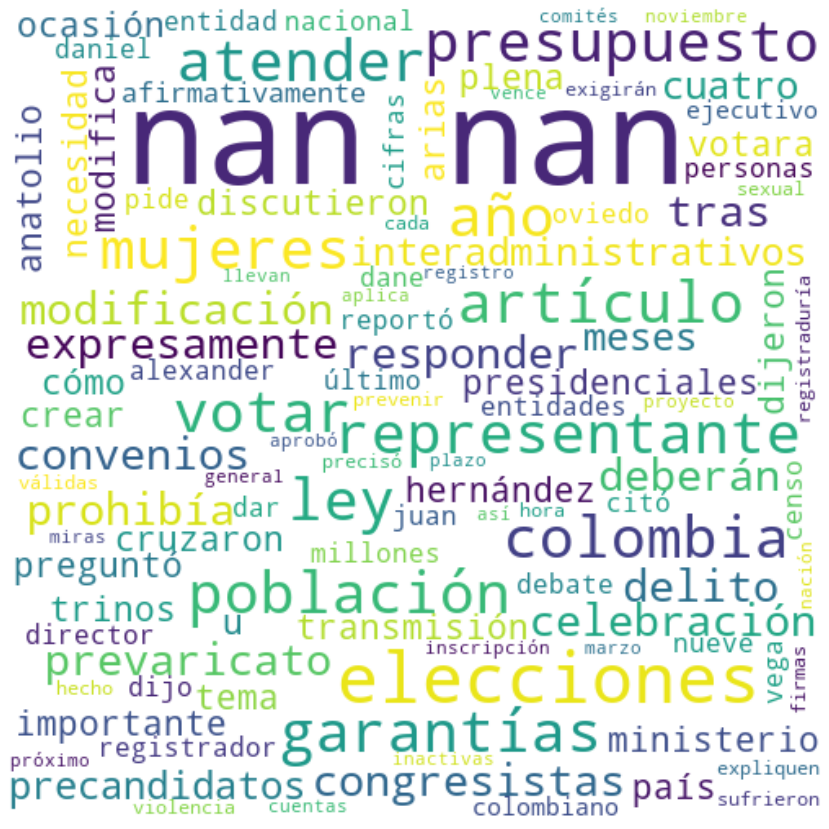

In [109]:
#Obtain all responses
try:
  text = " ".join(str(resp) for resp in df.summary)
except Exception as e:
  print(e)
  pass

text = text.lower()
print ("Total words {}.".format(len(text)))

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=500, height=500).generate(text)

#Display the generated image
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [115]:
df1 = pd.DataFrame(newsSalud)
df1.head()

,title,relative_path,datetime,author,summary,full_text,_id
0,Los dinosaurios vivían en manadas,/ciencia/los-dinosaurios-vivian-en-manadas/,22 oct. 2021 - 10:00 a. m.,Agencia EFE,Esto encontró un estudio publicado en Scientif...,Los dinosaurios se movían en manadas y lo hací...,617333b12574ba43522d11c4
1,"Diana Valencia, la colombiana que estudia vida...",/ciencia/diana-valencia-la-colombiana-que-estu...,21 oct. 2021 - 9:00 p. m.,Paula Casas Mogollón,La astrofísica planetaria fue reconocida con e...,En la vida de Diana Valencia las matemáticas s...,617333b12574ba43522d11c5
2,Subastan los fósiles del triceratops más grand...,/ciencia/pese-a-oposicion-de-cientificos-subas...,21 oct. 2021 - 5:52 p. m.,NaN,NaN,NaN,617333b12574ba43522d11c6
3,Otros europeos pisaron América casi cuatro sig...,/ciencia/otros-europeos-pisaron-america-casi-c...,NaN,NaN,NaN,NaN,617333b12574ba43522d11c7
4,Crean guía para estudiar con “estándares ético...,/ciencia/crean-guia-para-estudiar-con-estandar...,NaN,NaN,NaN,NaN,617333b12574ba43522d11c8


In [116]:
#Natural language Tool Kit.
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords 

#Frequent words used in spanish
stop_words = set(stopwords.words('spanish')) 
stop_words = stop_words.union(set(['dinosaurios', 'Desarrollo']))

#Print spanish stop words
print(stop_words)

{'estada', 'fueras', 'suyos', 'se', 'fueron', 'hubimos', 'estos', 'tuviera', 'hubiesen', 'también', 'fueseis', 'esos', 'hubiésemos', 'mucho', 'lo', 'estuvieses', 'estén', 'todo', 'contra', 'hubiese', 'sobre', 'sin', 'hayas', 'tuviesen', 'tenga', 'algunas', 'muy', 'tendrías', 'ante', 'nuestro', 'esto', 'tuvieras', 'como', 'hubieras', 'tuvieses', 'vuestro', 'ese', 'tendríamos', 'somos', 'has', 'tenemos', 'habida', 'nuestra', 'estéis', 'tuvisteis', 'estuvimos', 'haya', 'Desarrollo', 'le', 'otra', 'os', 'tenida', 'él', 'hubieseis', 'eso', 'nada', 'tened', 'tendría', 'esa', 'muchos', 'con', 'fui', 'tiene', 'habidos', 'teníais', 'serían', 'a', 'estaríamos', 'tengáis', 'hubieran', 'una', 'estarían', 'su', 'habrías', 'habido', 'sería', 'algo', 'fuera', 'estaríais', 'hubiéramos', 'estuviese', 'tuyos', 'les', 'fue', 'tienen', 'están', 'del', 'habría', 'erais', 'estuvieras', 'tengo', 'estás', 'hubisteis', 'me', 'tuvo', 'desde', 'e', 'mío', 'tienes', 'durante', 'tuyo', 'entre', 'estarás', 'esas', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total words 11851.


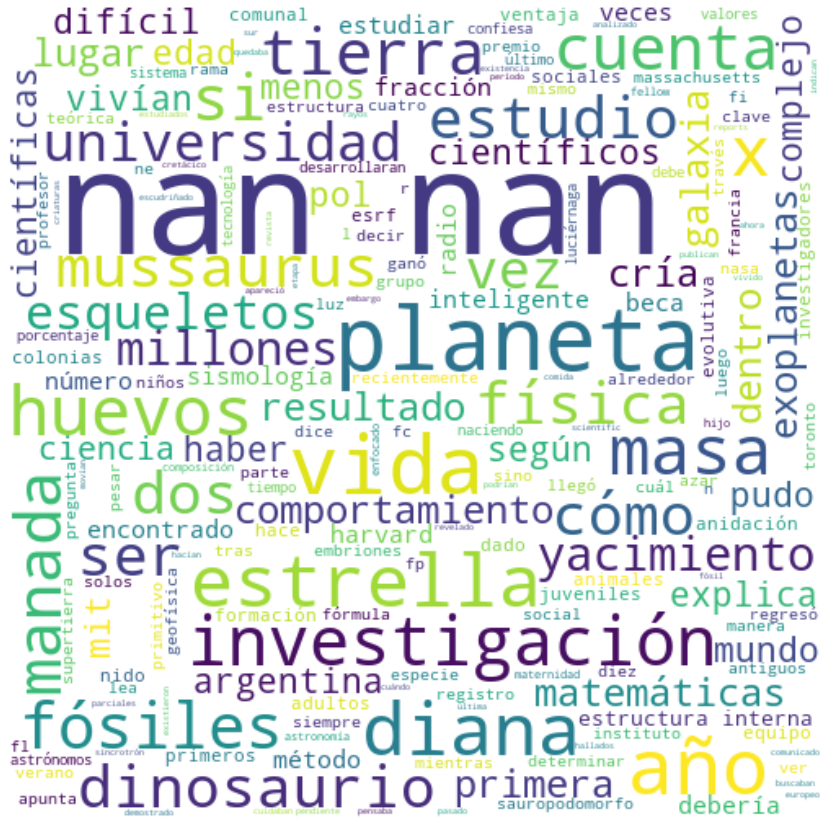

In [117]:
#Obtain all responses
try:
  text = " ".join(str(resp) for resp in df1.full_text)
except Exception as e:
  print(e)
  pass

text = text.lower()
print ("Total words {}.".format(len(text)))

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=500, height=500).generate(text)

#Display the generated image
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()